In [ ]:
!wget https://raw.githubusercontent.com/alimbekovKZ/ods_homework/master/data/wiki_machine_learning.csv

--2020-11-09 09:47:52--  https://raw.githubusercontent.com/alimbekovKZ/ods_homework/master/data/wiki_machine_learning.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31043 (30K) [text/plain]
Saving to: ‘wiki_machine_learning.csv.2’

wiki_machine_learni 100%[===================>]  30.32K  --.-KB/s    in 0.004s  

2020-11-09 09:47:52 (7.14 MB/s) - ‘wiki_machine_learning.csv.2’ saved [31043/31043]



In [ ]:
import pandas as pd
import os

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
import requests
import pandas as pd

In [ ]:
!pip install pmdarima

In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt

from pmdarima.arima import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('wiki_machine_learning.csv', sep = ' ')
df = df[df['count'] != 0]
df.head()

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning


In [ ]:
df.date = pd.to_datetime(df.date)

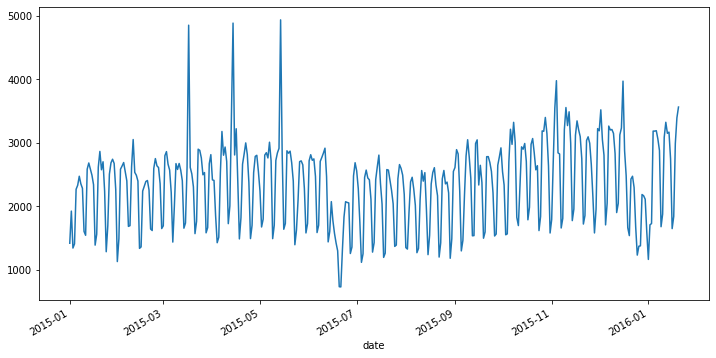

In [ ]:
df.set_index('date')['count'].plot(figsize=(12,6))

In [ ]:
predictions = 30

df = df[['date', 'count']]
df.columns = ['ds', 'y']
train_df = df[:-predictions].copy()

In [ ]:
#train, test = train_test_split(df['count'], shuffle=False)

In [ ]:
model = ARIMA(order=(1, 0, 2), seasonal_order=(0, 0, 0, 12))
model.fit(train_df.y)

ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 2), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 12),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
preds = model.predict(30)

test_y =  df[353:].y

print(mean_absolute_percentage_error(test_y, preds))

32.637102556150595


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [ ]:
predictions = 30

df = df[['date', 'count']]
df.columns = ['ds', 'y']
train_df = df[:-predictions].copy()

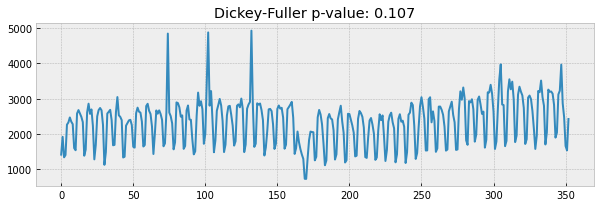

In [ ]:
def plotProcess(x):
    with plt.style.context('bmh'):  
        plt.figure(figsize=(10, 3))
        plt.plot(x)
        plt.title("Dickey-Fuller p-value: {}".format(round(sm.tsa.stattools.adfuller(x)[1], 3)))

plotProcess(train_df['y'].values)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



Критерий Дики-Фуллера: p=0.107392


<Figure size 1080x720 with 0 Axes>

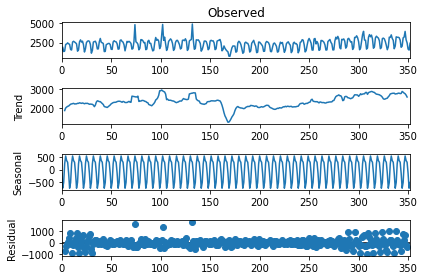

In [ ]:
plt.figure(figsize=(15,10))
sm.tsa.seasonal_decompose(train_df['y'].values, freq=7).plot();
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(train_df['y'])[1])

In [ ]:
sarima=train_df.set_index('ds')
sarima.index = pd.to_datetime(sarima.index)

Text(0, 0.5, 'Transformed article count')

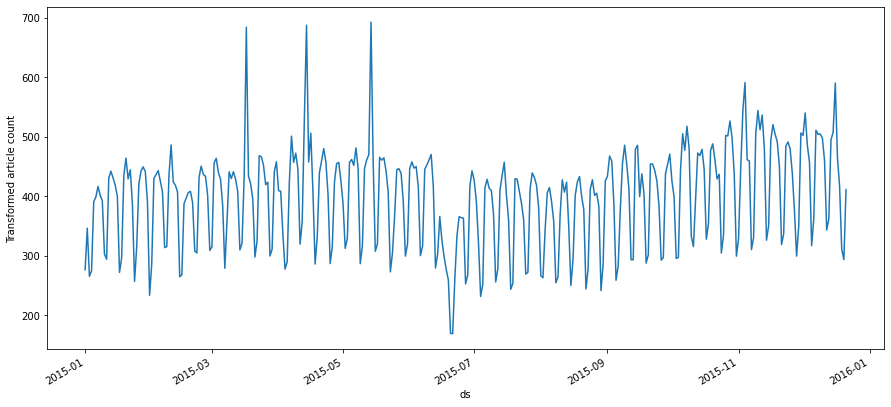

In [ ]:
from scipy import stats

sarima['y_box'], lmbda = stats.boxcox(sarima['y'])
plt.figure(figsize=(15,7))
sarima.y_box.plot()
plt.ylabel(u'Transformed article count')

In [ ]:
print("Оптимальный параметр преобразования Бокса-Кокса: %f" % lmbda)
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(sarima['y'])[1])

Оптимальный параметр преобразования Бокса-Кокса: 0.732841
Критерий Дики-Фуллера: p=0.107392


In [ ]:
train_df['y_box'], lmbda = stats.boxcox([1 if x == 0 else x for x in train_df['y']])

In [ ]:
train_df['y_box_diff'] = train_df.y_box - train_df.y_box.shift(7)
plt.figure(figsize=(15,10))
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(train_df.y_box_diff[8:])[1])

Критерий Дики-Фуллера: p=0.000000


<Figure size 1080x720 with 0 Axes>

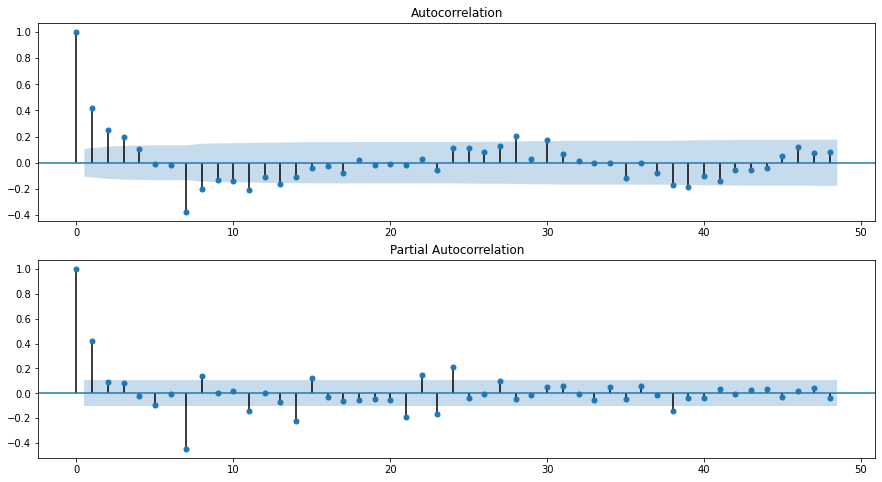

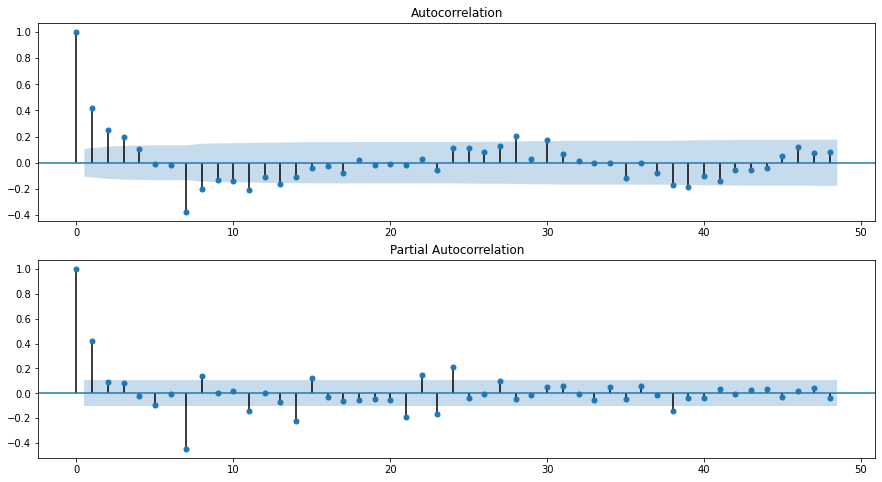

In [ ]:
plt.figure(figsize=(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(train_df.y_box_diff[13:].values.squeeze(), lags=48, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(train_df.y_box_diff[13:].values.squeeze(), lags=48, ax=ax)

In [ ]:
# Начальные приближения Q = 1, q = 4, P = 5, p = 3

In [ ]:
Ds = range(0,3)
ds = range(0,2)
Qs = range(0,2)
#shift = range(0,140)
q = 2
P = 3
p = 1
ss = range(6,8)
#trends = ['n','c','t','ct']
trends = ['n']

In [ ]:
from itertools import product
import statsmodels.api as sm
from tqdm import tqdm

parameters = product(Ds,ds,Qs,ss,trends)#,shift
parameters_list = list(parameters)
len(parameters_list)

24

In [ ]:
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', category=ConvergenceWarning)


pbar = tqdm(total=4)
results = []
best_aic = float("inf")

old_padam=-1
for param in range(4):
    pbar.update(1)
    
    if param==0:
        D = 1; d = 0; Q = 0; q = 2; P = 3; p = 1
    elif param==1:
        D = 2; d = 1; Q = 1; q = 2; P = 3; p = 1
    elif param==2:
        D = 1; d = 1; Q = 1; q = 2; P = 3; p = 1
    else:
        D = 0; d = 0; Q = 0; q = 2; P = 3; p = 1
    
    #sarima['y_box_diff'] = (sarima.y_box - sarima.y_box.shift(param[4]))
        
    #try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        #order=(p,d,q); seasonal_order=(P,D,Q,s) 
        model=sm.tsa.statespace.SARIMAX(sarima.y_box, order=(p, d, q), seasonal_order=(P, D, Q, 7)).fit(disp=False)
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except :
        #print('wrong parameters:', param)
        continue
    aic = model.aic
    #сохраняем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
        print('D = ',D,' d = ',d,'Q = ',Q,' q = ',q,' P = ',P,' p = ',p,'best_aic = ',aic)
    #results.append([param, model.aic])
    
warnings.filterwarnings('default')
pbar.close()

  0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 50%|█████     | 2/4 [00:02<00:02,  1.33s/it]

D =  1  d =  0 Q =  0  q =  2  P =  3  p =  1 best_aic =  3556.8800297533317


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 75%|███████▌  | 3/4 [00:09<00:02,  2.89s/it]

D =  2  d =  1 Q =  1  q =  2  P =  3  p =  1 best_aic =  3534.540192441823


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

100%|██████████| 4/4 [00:16<00:00,  4.31s/it]/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:99

In [ ]:
print(best_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               y_box   No. Observations:                  353
Model:             SARIMAX(1, 1, 2)x(3, 2, [1], 7)   Log Likelihood               -1759.270
Date:                             Mon, 09 Nov 2020   AIC                           3534.540
Time:                                     09:55:11   BIC                           3565.125
Sample:                                          0   HQIC                          3546.729
                                             - 353                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4770      0.118      4.059      0.000       0.247       0.707
ma.L1         -0.9903      

In [ ]:
model = sm.tsa.statespace.SARIMAX(train_df.y, order=(1, 1, 2), seasonal_order=(3, 2, 1, 7)).fit()
#model.fit(train_df.y)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
preds = model.predict(346,372)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:587: DeprecationWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [ ]:
test_y =  df[353:].y

print(mean_absolute_percentage_error(test_y, preds))

54.90732976528515
